Trying to code up a CNN based on resnet50 from scratch.

In [1]:
from importlib import reload
import flymovie as fm
import cnn_models.siamese_cnn as cn
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import pickle
import tensorflow as tf
from pathlib import Path

from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet

%load_ext autoreload
%autoreload 2


In [2]:
cache_dir = Path('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/test_sims_realnuc_10_UZpRgVbW')
target_shape = (100, 100)
channels_axis=1
train_dataset, val = cn.make_triplet_inputs(cache_dir, 100)

2022-02-12 16:42:14.503162: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-02-12 16:42:20.055706: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


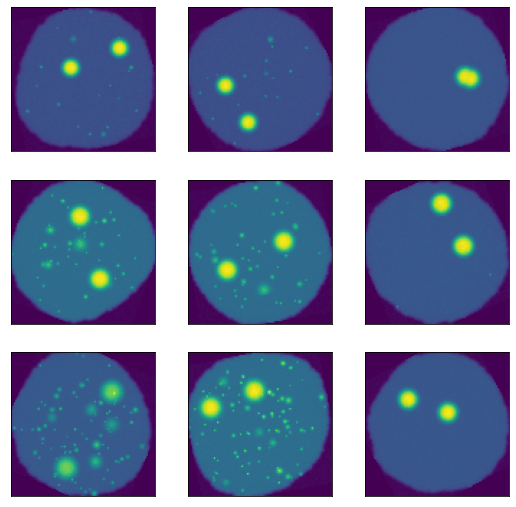

In [3]:
#2d
cache_dir = Path('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/test_sims_realnuc_10_UZpRgVbW')
target_shape = (100, 100)
channels_axis=1
train_dataset, val = cn.make_triplet_inputs(cache_dir, mip=True)

iter = train_dataset.as_numpy_iterator()
a = next(iter)

def show(ax, image):
        ax.imshow(image, vmin=0, vmax=1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig = plt.figure(figsize=(9, 9))

axs = fig.subplots(3, 3)
for i in range(3):
    show(axs[i, 0], a[0][i,:,:,0])
    show(axs[i, 1], a[1][i,:,:,0])
    show(axs[i, 2], a[2][i,:,:,0])

In [ ]:
#3d
cache_dir = Path('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/test_sims_realnuc_10_UZpRgVbW')
target_shape = (20,100, 100)
channels_axis=1
train_dataset, val = cn.make_triplet_inputs(cache_dir, 20, mip=False)

iter = train_dataset.as_numpy_iterator()
a = next(iter)

def show(ax, image):
        ax.imshow(image, vmin=0, vmax=1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig = plt.figure(figsize=(9, 9))

axs = fig.subplots(3, 3)
for i in range(3):
    show(axs[i, 0], a[0][i,:,:,:,0].max(axis=0))
    show(axs[i, 1], a[1][i,:,:,:,0].max(axis=0))
    show(axs[i, 2], a[2][i,:,:,:,0].max(axis=0))

In [ ]:
#2d
cache_dir = Path('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/test_sims_realnuc_50_iAKPibSh')
log_dir = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/tensorboard/tfmip-1'
train_dataset, val_dataset = cn.make_triplet_inputs(cache_dir, mip=True)
base_cnn = cn.make_base_cnn(image_shape=(100,100))
embedding = cn.make_embedding(base_cnn)
siamese_network = cn.make_siamese_network(embedding)
siamese_model = cn.SiameseModel(siamese_network)
siamese_model.compile(optimizer=optimizers.Adam(0.0001))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = siamese_model.fit(train_dataset, epochs=4, validation_data=val_dataset, verbose=True,
            callbacks=tensorboard_callback)


In [3]:
#3d
cache_dir = Path('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/test_sims_realnuc_50_iAKPibSh')
log_dir = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/tensorboard/tf3d-1-slow'
train_dataset, val_dataset = cn.make_triplet_inputs(cache_dir, mip=False)
base_cnn = cn.make_base_cnn_3d(image_shape=(20,100,100))
embedding = cn.make_embedding(base_cnn)
siamese_network = cn.make_siamese_network(embedding)
siamese_model = cn.SiameseModel(siamese_network)
siamese_model.compile(optimizer=optimizers.Adam(0.0001))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = siamese_model.fit(train_dataset, epochs=4, validation_data=val_dataset, verbose=True,
            callbacks=tensorboard_callback)


2022-01-28 10:27:44.622273: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-28 10:27:46.050344: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-01-28 10:27:46.050362: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-01-28 10:27:46.050417: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-01-28 10:27:46.065061: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/4
1/2 [==============>...............] - ETA: 30s - loss: 8.4070

2022-01-28 10:28:16.711411: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-01-28 10:28:16.711427: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


2/2 [==============================] - ETA: 0s - loss: 7.0283 

2022-01-28 10:28:21.838895: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-01-28 10:28:21.856919: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-01-28 10:28:21.869196: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /Users/michaelstadler/Bioinformatics/Projects/rpb1/tensorboard/tf3d-1-slow/train/plugins/profile/2022_01_28_10_28_21
2022-01-28 10:28:21.875378: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /Users/michaelstadler/Bioinformatics/Projects/rpb1/tensorboard/tf3d-1-slow/train/plugins/profile/2022_01_28_10_28_21/Michaels-MacBook-Pro-2.local.trace.json.gz
2022-01-28 10:28:21.904458: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /Users/michaelstadler/Bioinformatics/Projects/rpb1/tensorboard/tf3d-1-slow/train/plugins/profile/2022_01_28_10_28_21
2022-01-28 10:28:21.904770: I 

2/2 [==============================] - 42s 12s/step - loss: 7.0283 - val_loss: 11.0652
Epoch 2/4
2/2 [==============================] - 34s 10s/step - loss: 4.6495 - val_loss: 1.1885
Epoch 3/4
2/2 [==============================] - 32s 9s/step - loss: 1.7568 - val_loss: 0.4625
Epoch 4/4
2/2 [==============================] - 32s 9s/step - loss: 1.3552 - val_loss: 0.4261


In [ ]:
%load_ext tensorboard